In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
main_data = pd.read_csv("C:/Users/rajan/Downloads/bumble.csv")

In [5]:
main_data.head()

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++"
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)"
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english


In [4]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


Questions:
1. Which columns in the dataset have missing values, and what percentage of data is missing in each column?

2. Are there columns where more than 50% of the data is missing? Drop those columns where missing values are >50%.

3. Missing numerical data (e.g., height, income) should be handled by imputing the median value of height and income for the corresponding category, such as gender, age group, or location. This ensures that the imputed values are contextually relevant and reduce potential biases in the analysis.

In [11]:
misssing_value = main_data.isnull().sum().sort_values(ascending=False)
missing_Percent = (misssing_value/len(main_data))*100
missing_df = pd.DataFrame({'Missing Value': misssing_value,'Percentage': missing_Percent})
missing_df = missing_df[missing_df['Missing Value']>0]
print(missing_df)

           Missing Value  Percentage
diet               24395   40.694959
religion           20226   33.740366
pets               19921   33.231575
sign               11056   18.443266
job                 8198   13.675641
education           6628   11.056618
ethnicity           5680    9.475194
body_type           5296    8.834618
drinks              2985    4.979482
speaks                50    0.083408
height                 3    0.005005


In [12]:
#As per the requirement there is no column where more than 50% of the data is missing

In [21]:
#replaicing missing height data by the median of height
main_data['height'].fillna(main_data['height'].median(),inplace=True)
misssing_value = main_data.isnull().sum().sort_values(ascending=False)
misssing_value

diet           24395
religion       20226
pets           19921
sign           11056
job             8198
education       6628
ethnicity       5680
body_type       5296
drinks          2985
speaks            50
location           0
age                0
last_online        0
income             0
status             0
gender             0
height             0
dtype: int64

Questions:
1. Are there any inconsistencies in the data types across columns (e.g., numerical data stored as strings)?

2. Which columns require conversion to numerical data types for proper analysis (e.g., income)?

3. Does the last_online column need to be converted into a datetime format? What additional insights can be gained by analyzing this as a date field?

In [22]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59946 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


In [46]:
# Ans1 : yes there is inconsenties in data type such as last_online
# Ans 2: No columns requires conversion to numerical data types
# Replace '-' with ':' in time part if needed

# Ensure all values are strings
main_data['last_online'] = main_data['last_online'].astype(str)

# Remove timezone offsets (e.g., "-10:00", "+05:30")
main_data['last_online'] = main_data['last_online'].str.replace(r'([-+]\d{2}:\d{2})$', '', regex=True)

# Convert to datetime
main_data['last_online'] = pd.to_datetime(main_data['last_online'], errors='coerce')

# Verify the conversion
print(main_data.dtypes['last_online'])  # Should now be datetime64[ns]
print(main_data['last_online'].head())  # Check values



datetime64[ns]
0                   NaT
1                   NaT
2   2012-06-27 09:00:00
3   2012-06-28 14:00:00
4                   NaT
Name: last_online, dtype: datetime64[ns]


In [47]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          59946 non-null  int64         
 1   status       59946 non-null  object        
 2   gender       59946 non-null  object        
 3   body_type    54650 non-null  object        
 4   diet         35551 non-null  object        
 5   drinks       56961 non-null  object        
 6   education    53318 non-null  object        
 7   ethnicity    54266 non-null  object        
 8   height       59946 non-null  float64       
 9   income       59946 non-null  int64         
 10  job          51748 non-null  object        
 11  last_online  24051 non-null  datetime64[ns]
 12  location     59946 non-null  object        
 13  pets         40025 non-null  object        
 14  religion     39720 non-null  object        
 15  sign         48890 non-null  object        
 16  spea

Questions:
1. Are there any apparent outliers in numerical columns such as age, height, or income? What are the ranges of values in these columns?

2. Any -1 values in numerical columns like income should be replaced with 0, as they may represent missing or invalid data.

3. For other outliers, rather than deleting them, calculate the mean and median values using only the middle 80% of the data (removing extreme high and low values). This approach ensures that outliers do not disproportionately impact the analysis while retaining as much meaningful data as possible.

In [48]:
# Summary statistics for numerical columns
print(main_data[['age', 'height', 'income']].describe())


                age        height          income
count  59946.000000  59946.000000    59946.000000
mean      32.340290     68.295266    20033.222534
std        9.452779      3.994704    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


In [58]:
#calculate outlier for each numerical columns
Q1 = main_data[['age','height','income']].quantile(0.25)
Q3 = main_data[['age','height','income']].quantile(0.75)
IQR = Q3 - Q1

#identify outliers
outliers = (main_data[['age','height','income']] < (Q1 - 1.5 * IQR)) | (main_data[['age','height','income']] > (Q3 + 1.5 * IQR))
outlier_count = outliers.sum()
print(outlier_count)

age        2638
height      285
income    11504
dtype: int64


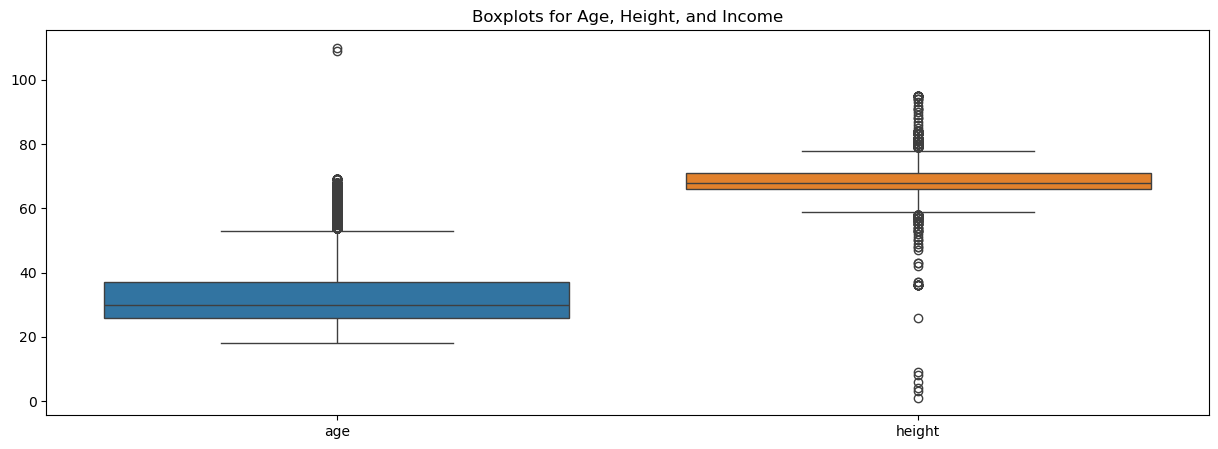

In [59]:
# Plot boxplots for numerical columns to chk the outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=main_data[['age', 'height']])
plt.title('Boxplots for Age, Height, and Income')
plt.show()


In [61]:
main_data['income'] = main_data['income'].replace(-1,0)
print(main_data['income'].head())

0        0
1    80000
2        0
3    20000
4        0
Name: income, dtype: int64


In [62]:
print(main_data[['age', 'height', 'income']].describe())

                age        height          income
count  59946.000000  59946.000000    59946.000000
mean      32.340290     68.295266    20034.030628
std        9.452779      3.994704    97346.025793
min       18.000000      1.000000        0.000000
25%       26.000000     66.000000        0.000000
50%       30.000000     68.000000        0.000000
75%       37.000000     71.000000        0.000000
max      110.000000     95.000000  1000000.000000


In [63]:
# Function to calculate mean and median after trimming extremes (middle 80%)
def calculate_trimmed_mean_median(data, column):
    # Sort the data for the given column
    sorted_data = data[column].sort_values()
    
    # Remove the bottom 10% and top 10% values (middle 80%)
    trimmed_data = sorted_data[int(len(sorted_data) * 0.1):int(len(sorted_data) * 0.9)]
    
    # Calculate mean and median on the trimmed data
    trimmed_mean = trimmed_data.mean()
    trimmed_median = trimmed_data.median()
    
    return trimmed_mean, trimmed_median

# Apply this function to each column: age, height, income
age_mean, age_median = calculate_trimmed_mean_median(main_data, 'age')
height_mean, height_median = calculate_trimmed_mean_median(main_data, 'height')
income_mean, income_median = calculate_trimmed_mean_median(main_data, 'income')

# Print the results
print(f"Age: Mean = {age_mean}, Median = {age_median}")
print(f"Height: Mean = {height_mean}, Median = {height_median}")
print(f"Income: Mean = {income_mean}, Median = {income_median}")


Age: Mean = 31.085972850678733, Median = 30.0
Height: Mean = 68.32771024042371, Median = 68.0
Income: Mean = 3250.411827261922, Median = 0.0


Create a heatmap to visualize missing values across the dataset. Which columns show consistent missing data patterns?

In [ ]:
# Generate a boolean mask where True represents missing values
missing_data = main_data.isnull()

# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)

# Add title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()